<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Netherlands-Data" data-toc-modified-id="Netherlands-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Netherlands Data</a></span></li><li><span><a href="#Load-data,-Fit-Model" data-toc-modified-id="Load-data,-Fit-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data, Fit Model</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li><li><span><a href="#Commentary" data-toc-modified-id="Commentary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Commentary</a></span><ul class="toc-item"><li><span><a href="#26-Apr" data-toc-modified-id="26-Apr-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>26 Apr</a></span></li></ul></li></ul></div>

## Netherlands Data
## Load data, Fit Model

In [1]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry
import pandas as pd

# Load data
country = 'Netherlands'
filepath = '../data/raw/'
fix_data = {}

nd = CovidCountry(country=country,
                  filepath=filepath,
                  fixes=fix_data)

nd.load()

In [2]:
nd.fit(curve='gamma')
nd_df = nd.predict()
nd.save(filepath='../data/processed/')

In [3]:
# Show small window of prediction and actual
nd_df[pd.Timestamp.now().date()-pd.Timedelta('3D'):].diff()[1:6]

,Actual,Prediction
Date,,
2020-05-21,253.0,173.251997
2020-05-22,188.0,162.581012
2020-05-23,NaN,152.482208
2020-05-24,NaN,142.934105
2020-05-25,NaN,133.915074


## Display Actual vs Prediction

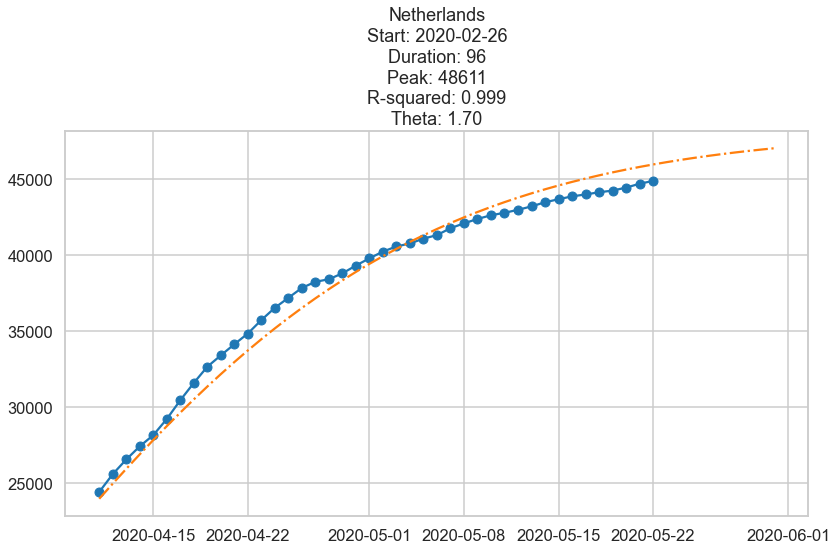

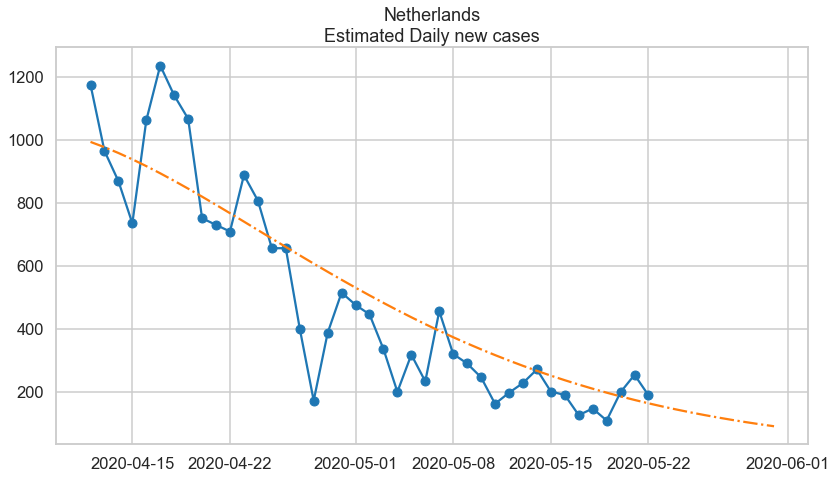

In [4]:
nd.display(offset=42)

## Commentary
### 1st May
Keep duration, but reduce total case guess. Doesn't make a change, but bring guess closer to most likely outcome.

### 26 Apr
Added today. I need to increase the range of theta in the grid search.